# Analiza i wizualizacja najpopularniejszych imion dla dzieci w Stanach Zjednoczonych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/matzim95/ML-datasets/master/US_Baby_Names_right.csv")

In [3]:
dataframe.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
del dataframe ["Unnamed: 0"]

In [5]:
del dataframe ["Id"]

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Name    1016395 non-null  object
 1   Year    1016395 non-null  int64 
 2   Gender  1016395 non-null  object
 3   State   1016395 non-null  object
 4   Count   1016395 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ MB


In [7]:
dataframe.describe()

,Year,Count
count,1.016395e+06,1.016395e+06
mean,2.009053e+03,3.485012e+01
std,3.138293e+00,9.739735e+01
min,2.004000e+03,5.000000e+00
25%,2.006000e+03,7.000000e+00
50%,2.009000e+03,1.100000e+01
75%,2.012000e+03,2.600000e+01
max,2.014000e+03,4.167000e+03


In [8]:
dataframe.value_counts()

Name      Year  Gender  State  Count
Zyriah    2014  F       TX     6        1
Emmely    2009  F       TX     7        1
Emmerson  2005  F       TX     7        1
                        MI     6        1
                        CA     6        1
                                       ..
Luis      2010  M       OH     45       1
                        NY     235      1
                        NV     92       1
                        NM     60       1
Aaban     2013  M       NY     6        1
Length: 1016395, dtype: int64

Sprawdzamy, czy w zbiorze jest więcej imion żeńskich czy męskich

In [9]:
(dataframe.Gender == "F").mean()

0.5498315123549408

In [10]:
(dataframe.Gender == "M").mean()

0.45016848764505923

In [11]:
female_percentage = (dataframe.Gender == "F").mean()

In [12]:
female_percentage = (dataframe.Gender == "F").mean()

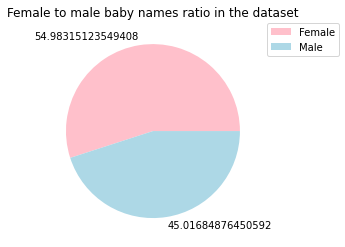

In [13]:
gender_value_counts = dataframe["Gender"].value_counts()
my_labels = ["Female", "Male"]
my_colors = ["pink", "lightblue"]
my_labels_percentage = [female_percentage*100, male_percentage*100]
plt.pie(gender_value_counts, labels = my_labels_percentage, colors = my_colors)
plt.legend(my_labels, bbox_to_anchor=(1, 1.02))
plt.title("Female to male baby names ratio in the dataset")
plt.show()

Powyższy wykres pokazuje, że w zbiorze danych jest nieco więcej imion żenskich niż męskich, a różnica to około 5%.

Sprawdzamy, ile różnych imion znajduje się w zbiorze danych

In [14]:
dataframe.Name.nunique()

17632

In [15]:
dataframe.groupby("Year").count()

,Name,Gender,State,Count
Year,,,,
2004,86420,86420,86420,86420
2005,88494,88494,88494,88494
2006,91803,91803,91803,91803
2007,94332,94332,94332,94332
2008,94970,94970,94970,94970
2009,94609,94609,94609,94609
2010,93307,93307,93307,93307
2011,92545,92545,92545,92545
2012,93024,93024,93024,93024


In [32]:
most_popular_names = (
    dataframe
    .groupby(["Name", "Gender"])
    .Count
    .sum()
    .reset_index()
    .sort_values("Count", ascending = False)
)

Sprawdzamy 20 najczęściej występujących imion w zbiorze danych

In [33]:
most_popular_names[:20]

,Name,Gender,Count
7740,Jacob,M,242706
5801,Emma,F,214757
13040,Michael,M,214228
6010,Ethan,M,209153
7499,Isabella,F,204742
18015,William,M,197796
9211,Joshua,M,191444
16545,Sophia,F,191421
4501,Daniel,M,191303
5789,Emily,F,190211


In [34]:
unique_names_per_gender = (
    dataframe
    .groupby(["Year", "Gender"])
    .Name
    .nunique()
    .unstack()
)

Sprawdzamy, ile było unikalnych imion dla dziewczynek i dla chłopców w każdym roku

In [35]:
unique_names_per_gender

Gender,F,M
Year,,
2004,5729,4263
2005,5694,4219
2006,5884,4315
2007,6044,4465
2008,6053,4425
2009,5989,4503
2010,5810,4404
2011,5780,4412
2012,5775,4366


(0.0, 6144.7)

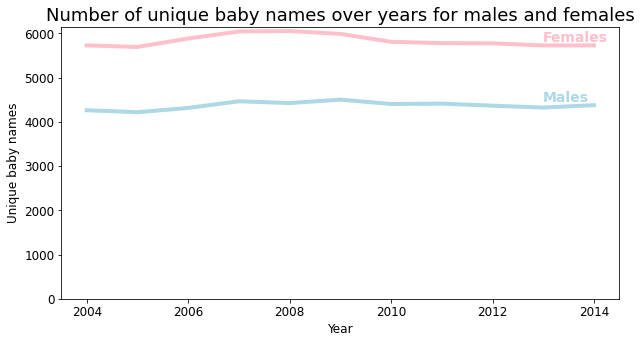

In [36]:
unique_names_per_gender.plot(figsize = (10, 5), linewidth = 4, color = ["Pink", "Lightblue"])
plt.ylabel("Unique baby names", fontsize = 12)
plt.xlabel("Year", fontsize = 12)
plt.text(2013, 5800, "Females", color = "Pink", fontsize = 14, fontweight = "bold")
plt.text(2013, 4460, "Males", color = "Lightblue", fontsize = 14, fontweight = "bold")
plt.legend([], frameon = False)
plt.title("Number of unique baby names over years for males and females", fontsize = 18)
ax = plt.gca()
ax.tick_params (axis = "both", labelsize = 12)
plt.ylim(0, None)

Z powyższego wykresu wynika to, że w zbiorze danych jest więcej unikalnych imion żeńskich niż męskich i te różnice są mniej więcej proporcjonalnie takie same w każdym roku. Nie jest to zazdziwiajace, ponieważ wiemy już, że wszystkich imion w zbiorze danych było więcej żeńskich niż męskich, o niecałe 5%.

In [38]:
unique_names_per_gender["F"].groupby("Year").value_counts()

Year  F   
2004  5729    1
2005  5694    1
2006  5884    1
2007  6044    1
2008  6053    1
2009  5989    1
2010  5810    1
2011  5780    1
2012  5775    1
2013  5728    1
2014  5729    1
Name: F, dtype: int64

In [39]:
unique_names_per_gender["M"].groupby("Year").value_counts()

Year  M   
2004  4263    1
2005  4219    1
2006  4315    1
2007  4465    1
2008  4425    1
2009  4503    1
2010  4404    1
2011  4412    1
2012  4366    1
2013  4324    1
2014  4377    1
Name: M, dtype: int64

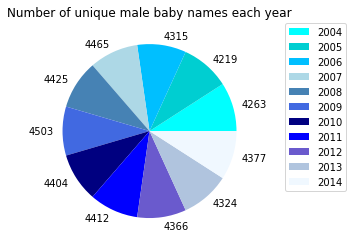

In [64]:
my_colors_male = ["aqua", "darkturquoise", "deepskyblue", "lightblue", "steelblue", "royalblue", "navy", "blue", "slateblue", "lightsteelblue", "aliceblue"]
my_labels_male = ["2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
my_labels_male_2 = ["4263", "4219","4315", "4465", "4425", "4503", "4404", "4412", "4366", "4324", "4377"]
plt.pie(unique_names_per_gender["M"].groupby("Year").value_counts(), colors = my_colors_male, labels = my_labels_male_2)
plt.title("Number of unique male baby names each year")
plt.legend(my_labels_male, bbox_to_anchor=(1.1, 1.02))
plt.show()

Powyższy wykres pokazuje liczbę unikalnych imion męskich w zbiorze danych w każdym roku. Liczby te różnią się bardzo nieznacznie, w każdym roku liczba unikalnych imion męskich jest podobna. 

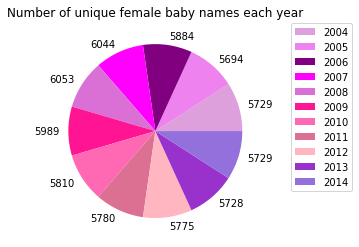

In [65]:
my_colors_female = ["plum", "violet", "purple", "magenta", "orchid", "deeppink", "hotpink", "palevioletred", "lightpink", "darkorchid", "mediumpurple"]
my_labels_female = ["2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
my_labels_female_2 = ["5729", "5694", "5884", "6044", "6053", "5989", "5810", "5780", "5775", "5728", "5729"]
plt.pie(unique_names_per_gender["F"].groupby("Year").value_counts(), colors = my_colors_female, labels = my_labels_female_2)
plt.title("Number of unique female baby names each year")
plt.legend(my_labels_female, bbox_to_anchor=(1.1, 1.02))
plt.show()

Powyższy wykres pokazuje liczbę unikalnych imion żeńskich w zbiorze danych w każdym roku. Liczby te różnią się bardzo nieznacznie, w każdym roku liczba unikalnych imion żeńskich jest podobna. 